**Question 1**

**Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from a normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats.**

The theoretical Simple Linear Regression model expresses a linear relationship between a single predictor (independent) variable and an outcome (dependent) variable. It is often represented by the equation: $Y= β_0 + β_1X + ϵ$ , where

- $Y$ is the dependent variable, the one we aim to predict or explain based on the predictor variable. 
- $X$ is the independent variable that is used to predict or explain changes in the outcome variable. 
- $β_0$ is the constant term that represents the value of 𝑌 when 𝑋 is zero. In other words, it is the expected value of 𝑌 when there is no influence from 𝑋.
- $β_1X$ represents the change in Y for a one-unit increase in X. It indicates the strength and direction of the linear relationship between X and Y. 
- $ϵ$ is a random variable that represents the deviation of the observed values from the expected values (the line defined by $β_0 + β_1X$). It captures the part of Y that cannot be explained by X alone. The error term is generally assumed to be normally distributed with a mean of zero and constant variance ($𝜎^2$).

In a theoretical model, if we assume:

$ϵ ∼ N(0, 𝜎^2)$

then each observed value of 𝑌 is a sample from a normal distribution centered around the line $β_0 + β_1X$ with a variance of $𝜎^2$. The model assumes that for each value of 𝑋, the distribution of 𝑌 values is normally distributed around the regression line, which captures the linear relationship between X and Y.

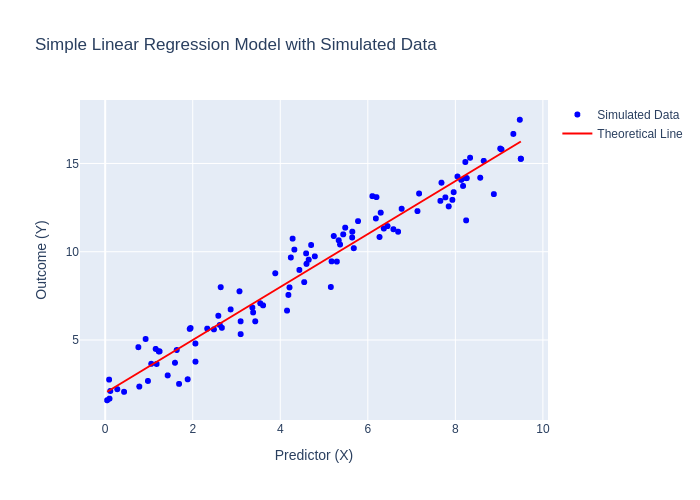

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Set parameters
n = 100            # Number of data points
beta0 = 2          # Intercept of the regression line
beta1 = 1.5        # Slope of the regression line
sigma = 1          # Standard deviation of the error term

# Generate predictor variable (X) sampled from a uniform distribution
X = uniform.rvs(0, 10, size=n)

# Generate error terms (epsilon) sampled from a normal distribution
epsilon = norm.rvs(0, sigma, size=n)

# Calculate outcome variable (Y) based on the Simple Linear Regression model
Y = beta0 + beta1 * X + epsilon

# Calculate the theoretical regression line values (without noise)
Y_line = beta0 + beta1 * X

# Create a scatter plot of the data and overlay the regression line
fig = go.Figure()

# Scatter plot for simulated data points
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Simulated Data', marker=dict(color='blue')))

# Line plot for the theoretical regression line
fig.add_trace(go.Scatter(x=np.sort(X), y=np.sort(Y_line), mode='lines', name='Theoretical Line', line=dict(color='red')))

# Update layout
fig.update_layout(title="Simple Linear Regression Model with Simulated Data",
                  xaxis_title="Predictor (X)",
                  yaxis_title="Outcome (Y)",
                  showlegend=True)

# Show the plot
fig.show(renderer = 'png')

**Question 2**

**Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf.**

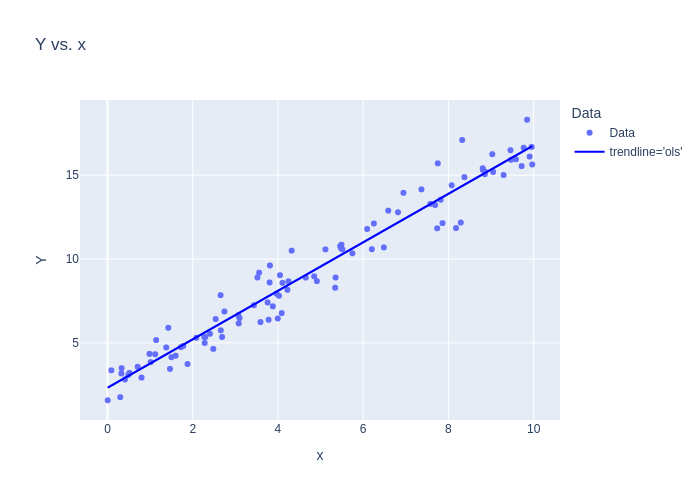

In [81]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # `statsmodels.formula.api` is a library for creating and fitting statistical models, 
# particularly useful for linear and generalized linear regression models in Python.

# Step 1: Simulate the data
n = 100
beta0 = 2
beta1 = 1.5
sigma = 1

# Generate predictors and error terms
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 2: Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)  # This specifies the OLS (Ordinary Least Squares) regression model,
# defining `Y` as the outcome variable and `x` as the predictor variable.

fitted_model = model_data_specification.fit() # This actually fits the model to the data, estimating the intercept and slope.

# Step 3: View model summary and parameters
fitted_model.summary() # Provides a comprehensive summary of the regression model fit, including estimates, t-values, 
# p-values, and R-squared.

fitted_model.summary().tables[1]  # Displays a concise table of regression coefficients, standard errors, t-statistics, 
# and p-values.

fitted_model.params  # Lists the estimated values of the model parameters, specifically the intercept (`const`) and 
# slope (`x`).

fitted_model.params.values  # Provides the parameter values as an array of just the numeric estimates, excluding labels.

fitted_model.rsquared  # Returns the R-squared value, a measure of the proportion of variance in `Y` explained by the model.

# Step 4: Visualize the data and the fitted trendline
df['Data'] = 'Data'  # Adds the data points as a scatter plot.
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x') 
# Adds a fitted OLS trendline using `trendline='ols'`.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer='png')

**Question 3**

**Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation.**

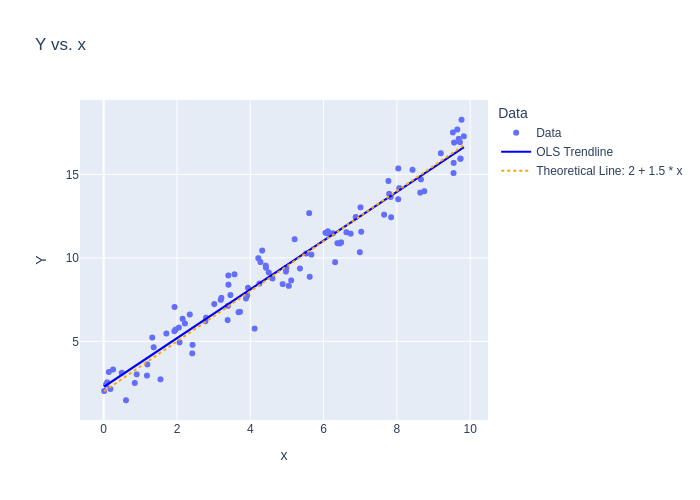

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
from scipy.stats import norm, uniform

# Set parameters for simulation
n = 100
beta0 = 2
beta1 = 1.5
sigma = 1

# Generate predictors and error terms
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add an extra column to identify data in the legend
df['Data'] = 'Data'

# Visualize the data and the fitted trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the OLS fitted line (essentially what `trendline='ols'` does)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="OLS Trendline")

# Add the theoretical line from the original parameters beta0 and beta1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f"Theoretical Line: {beta0} + {beta1} * x",
                line=dict(dash='dot', color='orange'))

# Show the figure
fig.show(renderer='png')

The theoretical line (shown in dotted orange) represents the true relationship between 𝑋 and 𝑌 according to the theoretical model $Y_i= β_0 + β_1X_i + 𝜖_i$ used to generate the simulated data, where $ϵ_i ∼ N(0, 𝜎^2)$. The line is defined by the true values of the population parameters $β_0$ and $β_1$.

Meanwhile, the OLS Trendline is generated by fitting a regression model to the simulated data points using the Ordinary Least Squares (OLS) method and the fitted model equation $\hat y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$. For each sample of simulated data points, the fitted model uses estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ derived from the sample data, which are approximations of $β_0$ and $β_1$.

Due to random sampling variation, the OLS line may slightly differ from the theoretical line because it tries to capture the trend in the noisy data rather than the exact theoretical relationship. The OLS line adjusts itself based on the observed data points, which are influenced by random noise. This variation in the OLS line across different samples of 𝑌 values highlights how random sampling affects the outcome; with new random errors, the fitted line could change slightly, while the theoretical line remains constant.

**Question 4**

**Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values).**

_fitted_model.fittedvalues_ returns the entire vector of fitted $\hat y_i$ values for each observation $x_i$. This is derived by first fitting the Simple Linear Regression model $\hat y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ to obtain values for $\hat{\beta}_0$ and $\hat{\beta}_1$, which are respectively the best estimates for the intercept and slope of the linear relationship which describes the data. $\hat{\beta}_0$ and $\hat{\beta}_1$ can then be accessed using _fitted_model.params_ or _fitted_model.params.values_.

Once $\hat{\beta}_0$ and $\hat{\beta}_1$ are determined, we use the fitted model equation $\hat y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ to calculate each value for $\hat y_i$ - by simply plugging in the corresponding value of $x_i$ in the fitted model equation.

**Question 5**

**Explain concisely what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares".**

The fitted line chosen by the Ordinary Least Squares (OLS) method is the line that minimizes the sum of the squared differences between the observed data points and the line itself. These differences, or "residuals," represent the error in predicting each 
𝑌 value from 𝑥 using the fitted line.

OLS uses squares of these residuals (rather than absolute values) to ensure:

- All errors contribute positively (since squaring makes all residuals positive).
- Larger errors are penalized more heavily (since squaring emphasizes larger deviations), which helps find a line that best represents the trend in the data.

**Question 6**

**Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**\*\***2 expressions capture in the context of Simple Linear Regression models.**

`A. 1 - ((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`

`B. fitted_model.rsquared`

`C. np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`

`D. np.corrcoef(Y,x)[0,1]**2`

The expression `1 - ((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` is the formula for calculating the value of $R^2$, which measures the proportion of variance in the outcome variable Y explained by the predictor variable. `(Y-fitted_model.fittedvalues)**2).sum()` is the Residual Sum of Squares (RSS), representing the unexplained variation in 𝑌. `((Y-Y.mean())**2).sum()` is the Total Sum of Squares (TSS), representing the total variation in 𝑌. $1 - \frac{RSS}{TSS}$ thus calculates the proportion of Y's total variation explained by the model, making it a measure of model accuracy.

`fitted_model.rsquared` is statsmodels’ built-in calculation for $R^2$, giving the same result as Expression A.

`np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` captures the squared correlation between 𝑌 and the predicted (fitted) values of 𝑌. In simple linear regression, the squared correlation between actual 𝑌 and predicted 𝑌 values is equal to $R^2$. Since correlation represents the linear relationship strength, squaring it gives the proportion of 𝑌’s variation explained by the linear relationship with 𝑥, which matches $R^2$.

`np.corrcoef(Y,x)[0,1]**2`  measures the proportion of variation in 𝑌 explained directly by 𝑥, and is the squared correlation between 𝑌 and 𝑥. In simple linear regression, this expression is also equal to $R^2$ as as all variance in fitted values comes from 𝑥.

**Question 7**

**Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below:**

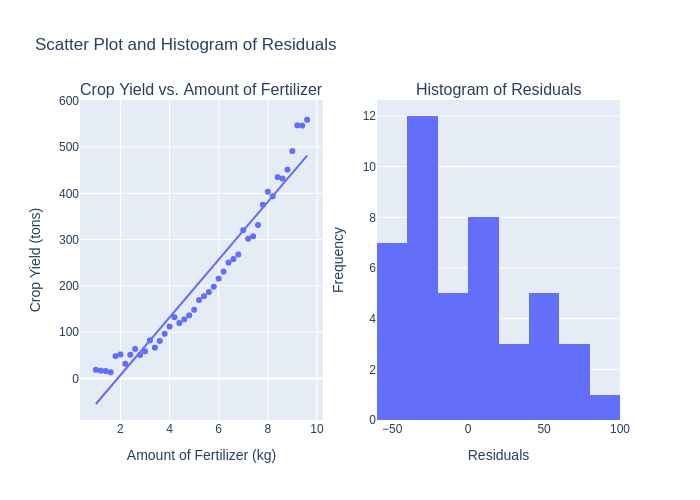

In [4]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png')

- **Linearity Assumption:** Simple Linear Regression assumes a linear relationship between the predictor 𝑥 (Amount of Fertilizer) and the outcome 𝑌 (Crop Yield). However, from the scatter plot, it seems that the relationship does not follow a straight line. Instead, crop yield appears to increase at an accelerating rate with more fertilizer. This curvature indicates a non-linear relationship, which violates the linearity assumption.

- **Normally Distributed Errors:** The histogram of residuals should ideally resemble a normal distribution, centered around zero, to satisfy the normality of errors assumption. In this data, the residuals do not follow a normal distribution. The non-normal, skewed residuals further suggest that a simple linear model might not be appropriate, as the errors (differences between observed values and predictions) are not symmetrically distributed around the regression line.

--------------------------------

**ChatBot session summary**: 1. Theoretical Understanding of Simple Linear Regression
Model Components: We discussed the theoretical components of the Simple Linear Regression model, where 
𝑌
Y (the outcome variable) is expressed as a function of 
𝑥
x (the predictor), an intercept term (
𝛽
0
β 
0
​
 ), a slope term (
𝛽
1
β 
1
​
 ), and a random error term (
𝜖
ϵ). The error term adds random variation to 
𝑌
Y around the line defined by 
𝛽
0
+
𝛽
1
𝑥
β 
0
​
 +β 
1
​
 x.
Purpose of Ordinary Least Squares (OLS): OLS finds the line that minimizes the sum of squared differences between observed 
𝑌
Y values and the values predicted by the model (i.e., the “fitted values”).
2. Simulation and Visualization of Data
Data Simulation: Using Python and libraries like numpy and scipy.stats, we simulated values for 
𝑥
x, added random error 
𝜖
ϵ from a normal distribution, and calculated 
𝑌
Y values using the linear equation. This helped visualize data points distributed around the theoretical regression line.
Plotting: We plotted these data points using plotly and overlaid the theoretical line (
𝛽
0
+
𝛽
1
𝑥
β 
0
​
 +β 
1
​
 x) to illustrate how points vary around it due to random error.
3. Using statsmodels for Fitting the Model
Setting Up the Model: Using statsmodels.formula.api (imported as smf), we specified and fit the model to our simulated data. We confirmed that smf.ols uses OLS to estimate the intercept and slope by minimizing the sum of squared residuals.
Interpreting Output: Through methods like .summary(), .params, and .rsquared, we explored the fitted model’s summary table, parameter estimates (intercept and slope), and 
𝑅
2
R 
2
  value (a measure of the model’s explanatory power).
4. Model Accuracy and 
𝑅
2
R 
2
 
Interpretation of 
𝑅
2
R 
2
 : We examined different expressions for 
𝑅
2
R 
2
 , notably 
1
−
SSR
SST
1− 
SST
SSR
​
  (the proportion of variance in 
𝑌
Y explained by the model), and confirmed how this value indicates model fit quality. We also related 
𝑅
2
R 
2
  to the squared correlation between 
𝑌
Y and 
𝑌
^
Y
^
  (fitted values).
5. Assumptions of the Simple Linear Regression Model
We summarized the key assumptions: Linearity, Independence of Errors, Homoscedasticity, Normality of Errors, No Multicollinearity (in multiple regression), and Absence of Outliers.
We applied these assumptions to example data to identify potential violations, such as non-linear relationships and non-normal errors.
6. Assumption Violations in Example Data
Through visualizations, we examined an example dataset where crop yield didn’t show a linear relationship with fertilizer amounts. This demonstrated violation of the Linearity and Normality of Errors assumptions, suggesting that a non-linear model might be more appropriate for that dataset.

**ChatBot Transcript log:** https://chatgpt.com/share/671e9fdd-d2b0-8012-91c7-f623c57a14d6

--------------------

**Question 8**

**Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.**

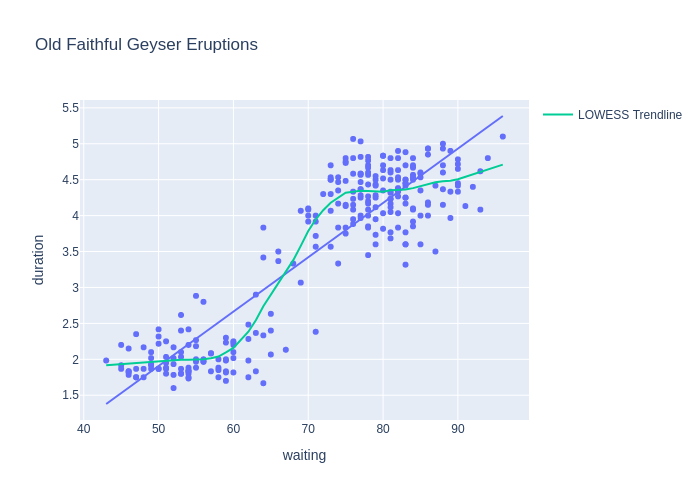

In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:09:26   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Hypotheses**

Null hypothesis ($H_0$): There is no linear association between waiting time and eruption duration ($\beta_1 = 0$).

Alternative hypothesis ($H_1$): There is a linear association between waiting time and eruption duration ($\beta_1 \not= 0$).

We reject the null hypothesis with a p-value of 0.000..., meaning we have very strong evidence against the null hypothesis.

**Question 9**

**As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


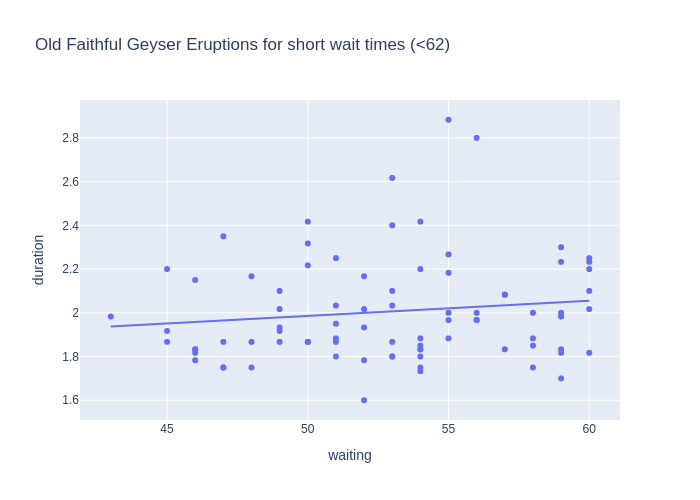

In [5]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = 'png')

**Hypotheses**

Null hypothesis ($H_0$): There is no linear association between short wait times (< 62) and eruption duration ($\beta_1 = 0$).

Alternative hypothesis ($H_1$): There is a linear association between short wait times (< 62) and eruption duration ($\beta_1 \not= 0$).

**Conclusion**

We fail to reject the null hypothesis with a p-value of 0.238, meaning we have no evidence against the null hypothesis.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


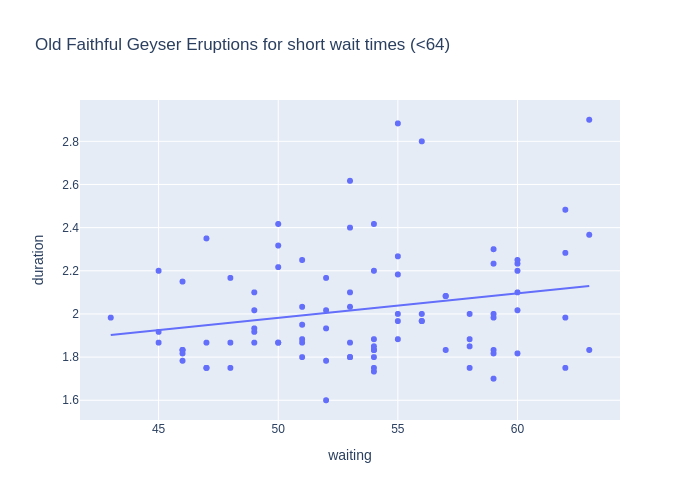

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = 'png')

**Hypotheses**

Null hypothesis ($H_0$): There is no linear association between short wait times (< 64) and eruption duration ($\beta_1 = 0$).

Alternative hypothesis ($H_1$): There is a linear association between short wait times (< 64) and eruption duration ($\beta_1 \not= 0$).

**Conclusion**

We reject the null hypothesis with a p-value of 0.036, meaning we have moderate evidence against the null hypothesis.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


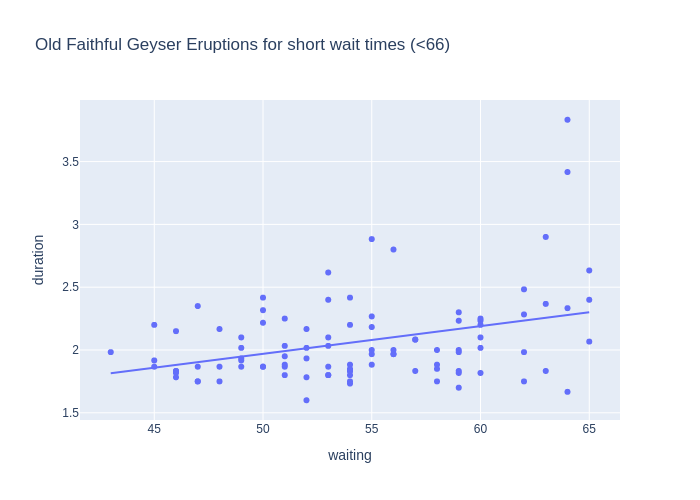

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = 'png')

In [8]:
smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().pvalues

Intercept    0.009781
waiting      0.000356
dtype: float64

**Hypotheses**

Null hypothesis ($H_0$): There is no linear association between short wait times (< 66) and eruption duration ($\beta_1 = 0$).

Alternative hypothesis ($H_1$): There is a linear association between short wait times (< 66) and eruption duration ($\beta_1 \not= 0$).

**Conclusion**

We reject the null hypothesis with a p-value of 0.000356, meaning we have very strong evidence against the null hypothesis.

**Question 10**

**Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:**

**1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


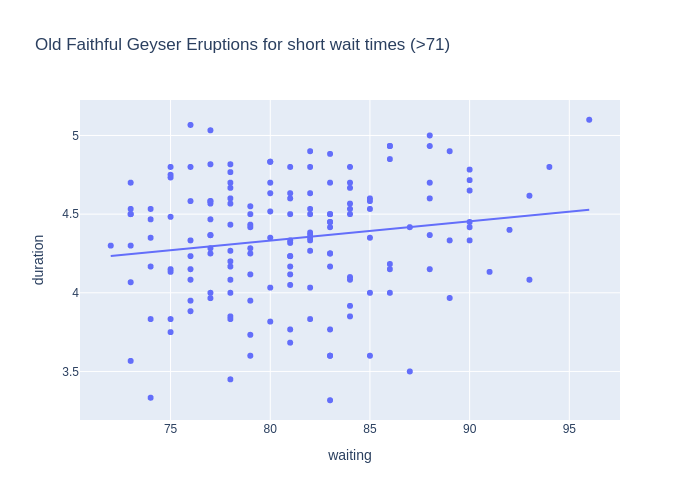

In [9]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = 'png')

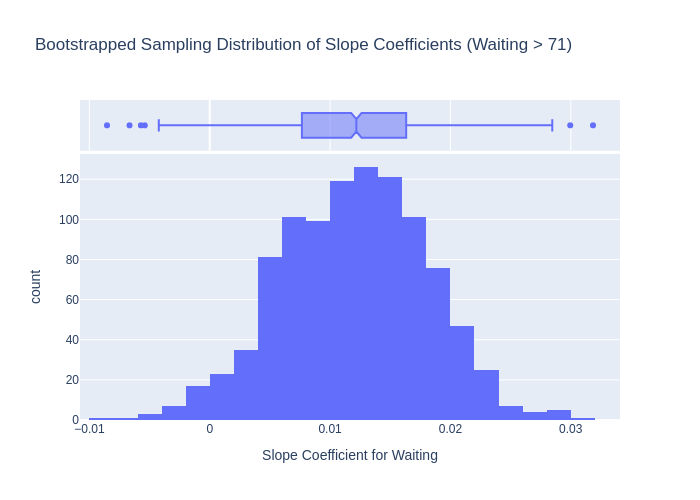

In [10]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait time threshold and filter data
long_wait_limit = 71
long_wait_data = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Number of bootstrap samples
n_bootstrap_samples = 1000
bootstrapped_slope_coefficients = []

# Generate bootstrap samples and fit the model on each
for _ in range(n_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    
    # Fit a simple linear regression model on the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Collect the slope coefficient (for 'waiting')
    bootstrapped_slope_coefficients.append(fitted_model.params['waiting'])

# Create a DataFrame for the slope coefficients to visualize with Plotly
slope_df = pd.DataFrame(bootstrapped_slope_coefficients, columns=['slope'])

# Plot the distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title='Bootstrapped Sampling Distribution of Slope Coefficients (Waiting > 71)',
                   labels={'slope': 'Slope Coefficient for Waiting'},
                   marginal='box')
fig.show(renderer = 'png')

****2. simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of \"no linear association (on average)\";**

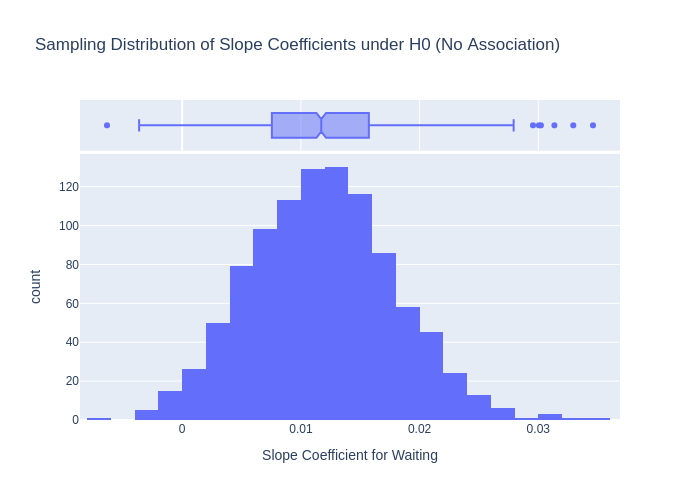

In [19]:
from scipy import stats

# Parameters for the null hypothesis simulation
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n_bootstrap_samples = 1000
sample_size = 160
simulated_slope_coefficients = []

# Create a simulated dataset under the null hypothesis
old_faithful_simulation = long_wait_data.copy()
old_faithful_simulation['duration'] = beta_0 + beta_1 * old_faithful_simulation['waiting'] + \
                                      stats.norm(loc=0, scale=sigma).rvs(size=len(old_faithful_simulation))

# Generate bootstrap samples and fit the model on each
for _ in range(n_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample = old_faithful_simulation.sample(n=sample_size, replace=True)
    
    # Fit a simple linear regression model on the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Collect the slope coefficient (for 'waiting')
    simulated_slope_coefficients.append(fitted_model.params['waiting'])

# Create a DataFrame for the slope coefficients to visualize with Plotly
slope_df = pd.DataFrame(simulated_slope_coefficients, columns=['slope'])

# Plot the distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title='Sampling Distribution of Slope Coefficients under H0 (No Association)',
                   labels={'slope': 'Slope Coefficient for Waiting'},
                   marginal='box')
fig.show(renderer = 'png')

**3. report if $0$ is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?**

In [20]:
np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

array([-0.00015715,  0.02320103])

In [21]:
(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()

/tmp/ipykernel_53/2849964514.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.471

In [17]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


**Report**

- 0 is not contained in the 95% bootstrapped confidence interval.
- The simulated p-value is slightly different from the p-value given by the summary table, but this does not affect the fact that there is evidence against the null hypothesis of no linear association.

**Question 11**

The previously considered model specifications assumed a linear relationship between waiting time and duration, either across all wait times (`smf.ols('duration ~ waiting', data=old_faithful)`) or separated into short and long waiting times (`smf.ols('duration ~ waiting', data=old_faithful[short_wait])` and
`smf.ols('duration ~ waiting', data=old_faithful[long_wait]` respectively), providing separate relationships for short and long wait times. These models assumed a continuous relationship between waiting times and eruption duration and attempted to fit a slope that represents this continuous change across all data (or separately for subsets).

On the other hand, the indicator variable model treats waiting time as a categorical variable by dividing it into "short" and "long" groups. This binary approach does not assume a gradual change in eruption duration with waiting time but rather considers the average difference in durations between two distinct types of wait times. The model estimates a single contrast (difference in means) between the two categories, rather than a continuous slope. This contrast ($𝛽_{contrast}$) represents the average increase or decrease in eruption duration when transitioning from "short" to "long" waits.

**Hypotheses**

Null hypothesis ($H_0$): There is no difference on average in eruption duration between the "short" and "long" wait groups ($𝛽_{contrast}=0$).

Alternative hypothesis ($H_1$): There is a difference on average in eruption duration between the "short" and "long" wait groups ($𝛽_{contrast} \not=0$).

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


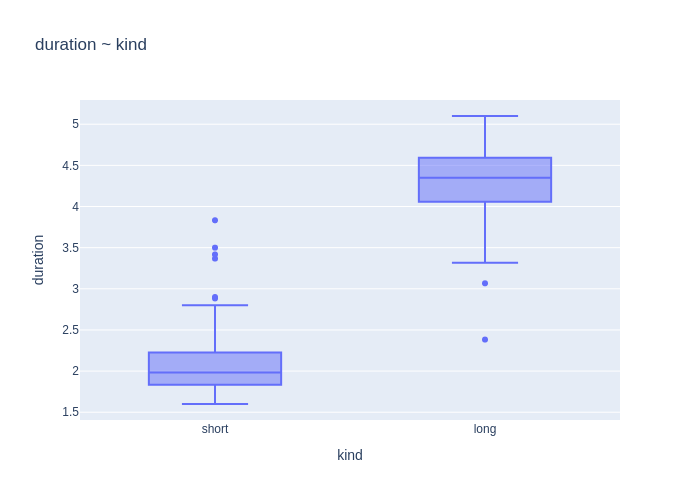

In [28]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') 

**Conclusion**

We reject the null hypothesis with a p-value of 0.000..., meaning we have very strong evidence against the null hypothesis.

**Question 12**

**Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.**

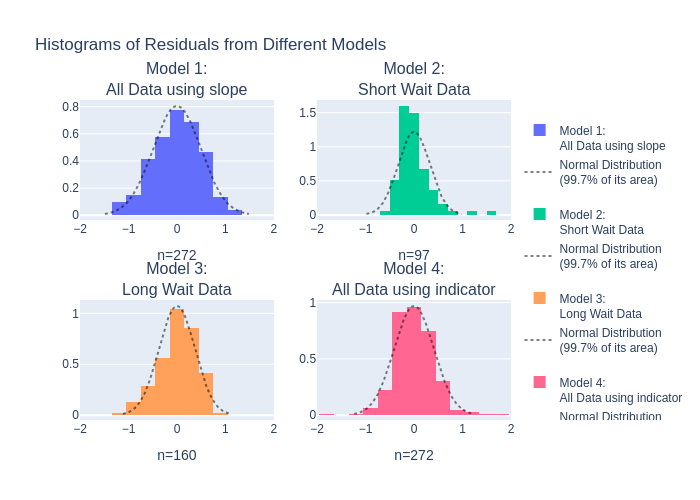

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png')

Histogram 1 best suggests the plausibility of the assumption that the distribution of error terms is normal. The data in Histogram 1 shows no skewness or significant deviation from the mean 0. Histogram 2 does not support the assumption as the data appears to be skewed to the right. Conversely, the long wait data in Histogram 3 seems to be left-skewed. Histogram 4 using indicator variable model data has extreme values very far from the mean 0.

**Question 13**

_Part a_

**(A) Permutation Test: Shuffling the Labels**

A permutation test assesses whether the observed difference in means between two groups ("short" and "long" wait times) is statistically significant by comparing it to the distribution of differences obtained by randomly shuffling the group labels.

**Steps:**
1. Calculate the observed difference in means between the "short" and "long" wait groups in the original data. This is the observed test statistic (the difference between the average eruption duration for the two groups).

2. Randomly shuffle the labels of the "short" and "long" wait times across the data points. In other words, randomly assign each eruption duration to either the "short" or "long" wait group (but without changing the actual waiting times). After shuffling, calculate the difference in means for the new, randomly-assigned groups.

3. Repeat the process (e.g., 10,000 times) to create a distribution of differences in means under the null hypothesis. The null hypothesis assumes there is no actual difference between the "short" and "long" wait groups, and that any observed difference is due to random chance.

4. Compare the observed test statistic from step 1 to the distribution of differences from the shuffling. The p-value is calculated as the proportion of shuffled differences that are as or more extreme than the observed difference in means. A small p-value suggests that the observed difference is unlikely to have occurred by random chance, and thus, we may reject the null hypothesis.

Hence, the permutation test works by creating a distribution under the null hypothesis (which assumes no difference between groups) and seeing where the observed difference falls in that distribution. The null hypothesis is tested by shuffling the data and examining whether the difference we observed is likely to have come from random reassignments.

**(B) Bootstrap Confidence Interval: Resampling within Each Group**

The bootstrap confidence interval creates a distribution of the statistic of interest (here, the difference in means) by resampling the data within each group, with replacement, to create many new "bootstrap samples". These samples are then used to estimate the confidence interval for the difference in means.

**Steps:**

1. For each group ("short" and "long" wait times), create many bootstrap samples by resampling with replacement. Each sample should have the same size as the original group. For example, if the "short" group has 80 observations, create new bootstrap samples by randomly selecting from these 80 observations, with replacement, to form new bootstrap samples.

2. For each bootstrap sample of "short" and "long", calculate the mean eruption duration.

3. For each pair of bootstrap samples (one from "short" and one from "long"), calculate the difference in the mean eruption durations between the two groups.

4. Repeat this process many times (e.g., 10,000 times) to create a distribution of the difference in means based on the bootstrap samples.

5. From the distribution of bootstrapped mean differences, calculate the 95% confidence interval by taking the 2.5th and 97.5th percentiles. This interval represents the range in which we expect the true difference in means to lie, with 95% confidence.

Therefore, the bootstrap confidence interval works by resampling the data (with replacement) and calculating the statistic of interest (in this case, the difference in means) for each bootstrap sample.
The distribution of these statistics gives us an estimate of the variability in the statistic, from which we can construct a confidence interval.

**Key Differences:**

- The permutation test focuses on hypothesis testing and provides a p-value, while the bootstrap confidence interval provides an interval estimate for the difference in means.
- Both methods are non-parametric, meaning they do not assume any specific underlying distribution for the data (such as normality), but the permutation test is more focused on testing the null hypothesis, while the bootstrap method is more focused on estimating uncertainty around the difference in means.

_Part b_

**1. Permutation Test:**

**_Similarities with the Indicator Variable Model:_**

- Group Comparison: Both the permutation test and the indicator variable model compare two groups, such as "short" and "long" wait times in your case.
- Both approaches are concerned with testing a null hypothesis: in the permutation test, the null hypothesis is that there is no difference between the groups (e.g., no difference in eruption duration between "short" and "long" wait times), while the indicator variable model assesses the difference in means for the two groups.

**_Differences from the Indicator Variable Model:_**

- Model Framework: The indicator variable model uses a regression framework, which explicitly models the relationship between the dependent variable (e.g., eruption duration) and the independent variable (e.g., wait time category), using an indicator variable to represent the group. This is a formal statistical model where we estimate coefficients for each group and assess their significance using traditional regression methods.
- Null Hypothesis Testing: The permutation test does not rely on any specific model structure. It is purely based on randomization and does not make any assumptions about the functional form of the relationship between the variables (it assumes no difference between the groups and assesses how likely the observed data are under random reassignment). In contrast, the indicator variable model relies on the assumption that the difference in means between the groups can be captured by the regression model.
- Inference: The permutation test provides a p-value to assess the significance of the observed difference. The indicator variable model, on the other hand, produces regression coefficients (with standard errors) that tell us the size of the difference between groups and whether it is statistically significant (usually with a p-value).

**2. Bootstrap Confidence Interval:**

**_Similarities with the Indicator Variable Model:_**

- Group Comparison: Like the indicator variable-based model, the bootstrap method can be applied to compare two groups. For example, you could resample within the "short" and "long" wait groups to estimate the variability in the difference in means.
- Non-parametric: Both the bootstrap method and the indicator variable model are flexible and do not rely on specific assumptions about the underlying distribution of the data. The indicator variable model makes fewer assumptions than traditional linear regression, but the bootstrap does not assume normality or any specific model structure.

**_Differences from the Indicator Variable Model:_**

- Focus on Uncertainty: The bootstrap method is focused on estimating the uncertainty around the statistic (the difference in means) by providing a confidence interval. It answers the question: "What is the range of plausible values for the true difference in means?" The indicator variable model, on the other hand, directly estimates the difference between groups as a coefficient and provides a standard error for it.
- Estimation vs. Hypothesis Testing: The bootstrap method is more focused on estimating variability of the statistic, whereas the indicator variable model is designed to estimate the difference and test hypotheses about whether that difference is statistically significant. The indicator variable approach is typically used for hypothesis testing and making inferences about the relationship between variables.
- Interpretation: The bootstrap provides a range (a confidence interval) for the difference in means, whereas the indicator variable model provides an estimate of the mean difference along with a p-value to assess whether that difference is statistically significant.

**3. Indicator Variable-Based Model (Regression Approach):**

**_Similarities with the Permutation Test:_**

- Group Comparison: Both the indicator variable model and the permutation test are used to compare two groups. The indicator variable model estimates the difference in means directly, while the permutation test evaluates whether the observed difference is likely to have occurred by random chance.
- Null Hypothesis Testing: Both approaches are used to assess whether there is a statistically significant difference between the groups. The permutation test does so by comparing the observed difference to the distribution of differences obtained through random label shuffling, while the indicator variable model assesses significance through p-values from regression coefficients.

**_Differences from the Permutation Test:_**

- Modeling Framework: The indicator variable-based model uses a regression framework to explicitly model the relationship between the dependent and independent variables. It provides both the estimated difference and the confidence in that estimate. The permutation test, however, does not rely on a model but rather assesses the likelihood of obtaining the observed difference under random assignment of the group labels.
- Test Statistic: The indicator variable model produces a test statistic (regression coefficient) along with a p-value that indicates whether the difference is statistically significant. The permutation test does not produce a test statistic in the same sense but rather provides a p-value by comparing the observed statistic to the distribution created through shuffling.

**ChatBot session summary:** 

Summary of Interactions
Initial Analysis and Regression Models:

We began by discussing an analysis of the Old Faithful Geyser dataset. You created a scatter plot with a Simple Linear Regression trendline and examined how eruption durations varied with waiting times.
You generated both OLS regression models and LOWESS (locally weighted scatterplot smoothing) trendlines to analyze the data.
You also explored bootstrapping and confidence intervals to understand the variability in the slope coefficients from these models.
Bootstrapping and Permutation Testing:

We created bootstrapped samples of the Old Faithful data and examined the sampling distribution of slope coefficients.
We also discussed a permutation test to test for statistical significance by shuffling group labels (for short and long wait times) to create a null distribution of the difference in means.
You learned how to visualize the bootstrapped distribution of the slope coefficients and evaluate their confidence intervals, as well as how to compare those with the results from OLS regression models.
Analysis of Wait Time Categories:

The dataset was divided into "short" and "long" wait times using a threshold of 68 minutes and the corresponding regression models were developed using these categories.
We explored the implications of modeling the data using indicator variables (representing "short" and "long" categories) and contrasted this approach with earlier analyses using continuous predictors.
Normality of Error Terms:

We examined the distribution of residuals from different regression models (e.g., all data, short wait data, long wait data) to assess whether the normality assumption for error terms was valid. Histograms were generated with normal distribution overlays to compare model fit and assess deviations from normality.
Comparison of Statistical Methods:

We discussed and compared two non-parametric methods for comparing groups: the permutation test and bootstrap confidence intervals. Both methods allow for comparison of means between "short" and "long" wait times without assuming normality of error terms or linear relationships.
Finally, we compared these methods with the indicator variable-based regression approach, noting the similarities and differences in terms of statistical assumptions, focus (hypothesis testing vs. estimation), and output (p-values vs. confidence intervals).
Final Explanation:

The permutation test provides a p-value by comparing the observed statistic against a distribution obtained through randomization, testing whether the observed difference could have arisen by chance.
The bootstrap method provides a confidence interval around the difference in means, quantifying the uncertainty in the estimate.
The indicator variable-based regression uses a formal model to estimate group differences and test significance using traditional regression methods.
Conclusion:
Throughout our interactions, we explored various methods for comparing groups and analyzing the relationship between variables. We utilized OLS regression models, bootstrapping, permutation tests, and indicator variables to assess the significance of differences between short and long wait times in the Old Faithful Geyser dataset. Additionally, we examined the normality of residuals to assess model assumptions and considered the big picture differences between these statistical techniques.

This summary encapsulates the main steps taken in your analysis and provides insight into various statistical approaches for hypothesis testing and estimating group differences.


**ChatBot transcript log:** https://chatgpt.com/share/672c4538-c04c-8013-a967-39e545e0e3e9